<a href="https://colab.research.google.com/github/faizanali02/googlecolab/blob/main/233574_ai_lab06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Initial Maze Matrix (a):
 [[1 1 1 1 1 1 1 1 1 1]
 [1 0 1 0 1 0 0 0 0 1]
 [1 0 1 0 1 0 0 0 0 1]
 [1 0 1 0 1 1 1 1 0 1]
 [1 0 1 0 0 0 0 1 0 1]
 [1 0 1 0 0 0 0 1 0 1]
 [1 0 0 0 0 0 0 1 0 1]
 [1 0 1 0 0 0 0 0 0 1]
 [1 0 1 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1]]

Step Matrix Initialized (m):
 [[0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]

Wave propagation complete!
Steps taken (k): 13

Shortest Path Found:
[(1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (7, 6), (7, 7), (7, 8)]
Path Length: 14

Maze solving animation saved as: maze_solution.gif


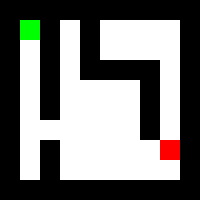

In [1]:
# ================================
# 🧠 Lab 6 — Wave Propagation Maze Solver
# Intelligent Agent for Shortest Path Finding
# ================================

# --- Install dependencies ---
!pip install pillow numpy --quiet

import numpy as np
from PIL import Image, ImageDraw
from IPython.display import Image as IPImage, display
import time

# ============================================================
# Activity 1 — Maze Representation & Initialization
# ============================================================

a = [
    [1,1,1,1,1,1,1,1,1,1],
    [1,0,1,0,1,0,0,0,0,1],
    [1,0,1,0,1,0,0,0,0,1],
    [1,0,1,0,1,1,1,1,0,1],
    [1,0,1,0,0,0,0,1,0,1],
    [1,0,1,0,0,0,0,1,0,1],
    [1,0,0,0,0,0,0,1,0,1],
    [1,0,1,0,0,0,0,0,0,1],
    [1,0,1,0,0,0,0,0,0,1],
    [1,1,1,1,1,1,1,1,1,1]
]
a = np.array(a)
m = np.zeros((len(a), len(a[0])), dtype=int)

start, end = (1,1), (7,8)
m[start] = 1

print("Initial Maze Matrix (a):\n", a)
print("\nStep Matrix Initialized (m):\n", m)

# ============================================================
# Activity 2 — Step Propagation Algorithm (Wave Expansion)
# ============================================================

def make_step(k):
    for i in range(len(m)):
        for j in range(len(m[i])):
            if m[i][j] == k:
                if i > 0 and m[i-1][j] == 0 and a[i-1][j] == 0:
                    m[i-1][j] = k + 1
                if j > 0 and m[i][j-1] == 0 and a[i][j-1] == 0:
                    m[i][j-1] = k + 1
                if i < len(m)-1 and m[i+1][j] == 0 and a[i+1][j] == 0:
                    m[i+1][j] = k + 1
                if j < len(m[i])-1 and m[i][j+1] == 0 and a[i][j+1] == 0:
                    m[i][j+1] = k + 1

k = 0
images = []

def draw_matrix(a, m, path=[]):
    zoom = 20
    im = Image.new('RGB', (zoom*len(a[0]), zoom*len(a)), (255,255,255))
    draw = ImageDraw.Draw(im)
    for i in range(len(a)):
        for j in range(len(a[i])):
            color = (255,255,255)
            if a[i][j] == 1:
                color = (0,0,0)
            if (i,j) == start:
                color = (0,255,0)
            if (i,j) == end:
                color = (255,0,0)
            draw.rectangle((j*zoom, i*zoom, j*zoom+zoom, i*zoom+zoom), fill=color)
    for (i,j) in path:
        draw.ellipse((j*zoom+5, i*zoom+5, j*zoom+15, i*zoom+15), fill=(255,0,0))
    return im

# --- Wave Propagation ---
while m[end] == 0:
    k += 1
    make_step(k)
    images.append(draw_matrix(a, m))
    if k > 1000: break  # safety stop

print("\nWave propagation complete!")
print("Steps taken (k):", k)

# ============================================================
# Activity 3 — Backtracking (Shortest Path)
# ============================================================

i, j = end
k = m[i][j]
path = [(i, j)]
while k > 1:
    if i > 0 and m[i-1][j] == k-1:
        i, j = i-1, j
    elif j > 0 and m[i][j-1] == k-1:
        i, j = i, j-1
    elif i < len(m)-1 and m[i+1][j] == k-1:
        i, j = i+1, j
    elif j < len(m[i])-1 and m[i][j+1] == k-1:
        i, j = i, j+1
    path.append((i, j))
    k -= 1

path.reverse()
print("\nShortest Path Found:")
print(path)
print("Path Length:", len(path))

# ============================================================
# Activity 4 — Visualization & Animation
# ============================================================

# Add final path visualization
final_image = draw_matrix(a, m, path)
images.append(final_image)

# Save animation
gif_path = "maze_solution.gif"
images[0].save(gif_path, save_all=True, append_images=images[1:], duration=80, loop=0)

print(f"\nMaze solving animation saved as: {gif_path}")
display(IPImage(filename=gif_path))


Shortest Path: [(1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (7, 6), (7, 7), (7, 8)]
Path Length: 14


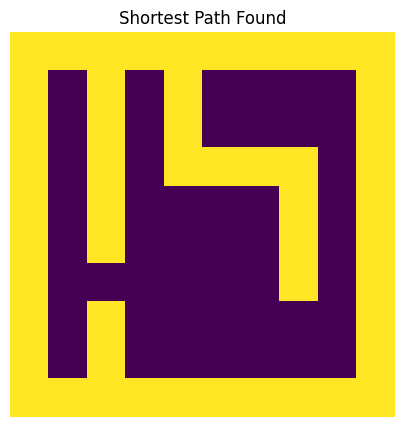

In [3]:
# ============================================================
# 🧭 Lab 6: Intelligent Maze Solver using Wave Propagation (Colab Version)
# ============================================================

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from PIL import Image, ImageDraw

# -------------------------
# Activity 1 — Maze Setup
# -------------------------
a = [
    [1,1,1,1,1,1,1,1,1,1],
    [1,0,1,0,1,0,0,0,0,1],
    [1,0,1,0,1,0,0,0,0,1],
    [1,0,1,0,1,1,1,1,0,1],
    [1,0,1,0,0,0,0,1,0,1],
    [1,0,1,0,0,0,0,1,0,1],
    [1,0,0,0,0,0,0,1,0,1],
    [1,0,1,0,0,0,0,0,0,1],
    [1,0,1,0,0,0,0,0,0,1],
    [1,1,1,1,1,1,1,1,1,1]
]
a = np.array(a)
m = np.zeros_like(a)
start, end = (1,1), (7,8)
m[start] = 1

# -------------------------
# Activity 2 — Wave Expansion
# -------------------------
def make_step(k):
    for i in range(len(m)):
        for j in range(len(m[i])):
            if m[i][j] == k:
                if i > 0 and m[i-1][j] == 0 and a[i-1][j] == 0:
                    m[i-1][j] = k + 1
                if j > 0 and m[i][j-1] == 0 and a[i][j-1] == 0:
                    m[i][j-1] = k + 1
                if i < len(m)-1 and m[i+1][j] == 0 and a[i+1][j] == 0:
                    m[i+1][j] = k + 1
                if j < len(m[i])-1 and m[i][j+1] == 0 and a[i][j+1] == 0:
                    m[i][j+1] = k + 1

frames = []
k = 0
while m[end] == 0:
    k += 1
    make_step(k)
    frames.append(np.copy(m))

# -------------------------
# Activity 3 — Backtracking
# -------------------------
i, j = end
k = m[i][j]
path = [(i, j)]
while k > 1:
    if i > 0 and m[i-1][j] == k-1:
        i, j = i-1, j
    elif j > 0 and m[i][j-1] == k-1:
        i, j = i, j-1
    elif i < len(m)-1 and m[i+1][j] == k-1:
        i, j = i+1, j
    elif j < len(m[i])-1 and m[i][j+1] == k-1:
        i, j = i, j+1
    path.append((i, j))
    k -= 1
path.reverse()

print("Shortest Path:", path)
print("Path Length:", len(path))

# -------------------------
# Activity 4 — Visualization
# -------------------------
fig, ax = plt.subplots(figsize=(5,5))

def update(frame):
    ax.clear()
    maze = np.copy(a)
    maze[a == 1] = -1
    maze[frame > 0] = frame[frame > 0]
    ax.imshow(maze, cmap="coolwarm", origin="upper")
    ax.set_title("Wave Propagation Search")
    ax.set_xticks([]); ax.set_yticks([])

ani = animation.FuncAnimation(fig, update, frames=frames, interval=150, repeat=False)
plt.close(fig)
from IPython.display import HTML
HTML(ani.to_jshtml())

# -------------------------
# Final Static Result with Path
# -------------------------
plt.figure(figsize=(5,5))
maze_img = np.copy(a)
for (i,j) in path:
    maze_img[i][j] = 0.5  # path color
plt.imshow(maze_img, cmap='viridis', origin='upper')
plt.title("Shortest Path Found")
plt.axis('off')
plt.show()
